In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Read data from the CSV file 'SBAnational.csv' into a DataFrame named 'df'
data_path="SBAnational.csv"
df=pd.read_csv(data_path)

C:\Users\peter\AppData\Local\Temp\ipykernel_43280\2525685944.py:3: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(data_path)


In [3]:
df.head()

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"


In [4]:
df.describe()

,LoanNr_ChkDgt,Zip,NAICS,Term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural
count,8.991640e+05,899164.000000,899164.000000,899164.000000,899164.000000,899028.000000,899164.000000,899164.000000,899164.000000,899164.000000
mean,4.772612e+09,53804.391241,398660.950146,110.773078,11.411353,1.280404,8.430376,10.797257,2753.725933,0.757748
std,2.538175e+09,31184.159152,263318.312760,78.857305,74.108196,0.451750,236.688165,237.120600,12758.019136,0.646436
min,1.000014e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.589758e+09,27587.000000,235210.000000,60.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.361439e+09,55410.000000,445310.000000,84.000000,4.000000,1.000000,0.000000,1.000000,1.000000,1.000000
75%,6.904627e+09,83704.000000,561730.000000,120.000000,10.000000,2.000000,1.000000,4.000000,1.000000,1.000000
max,9.996003e+09,99999.000000,928120.000000,569.000000,9999.000000,2.000000,8800.000000,9500.000000,99999.000000,2.000000


In [5]:
df.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

# DETAILS OF THE NORMALIZED DATABASE


The Database is built as per normalization criteria given by 1NF, 2NF and 3NF.

Four tables are created as follows:

1. CITY TABLE
   CITYID INTEGER PRIMARY KEY
   CITYNAME TEXT NOT NULL
   STATE TEXT NOT NULL
   ZIP INTEGER NOT NULL

2. BANK TABLE
   BANKID INTEGER PRIMARY KEY
   BANKNAME TEXT NOT NULL
   BANKSTATE TEXT NOT NULL

3. NAICS TABLE
   ID INTEGER PRIMARY KEY
   SECTOR INTEGER NOT NULL
   DESCRIPTION TEXT NOT NULL

4. LOAN_DETAILS TABLE
   LOANNUMBER DOUBLE PRIMARY KEY
   CUSTOMER_NAME TEXT NOT NULL
   CITYID INTEGER NOT NULL FOREIGN KEY TO CITY TABLE
   BANKID INTEGER NOT NULL FOREIGN KEY TO BANK TABLE
   NAICS TEXT NOT NULL FOREIGN KEY TO NAICS TABLE
   APPROVALDATE DATE
   TERM INTEGER NOT NULL
   NOEMP INTEGER
   NEWEXIST INTEGER
   CREATEJOB INTEGER
   RETAINEDJOB INTEGER
   FRANCHISECODE INTEGER
   URBANRURAL INTEGER
   REVLINECR TEXT
   LOWDOC TEXT NOT NULL
   DISBURSEMENTDATE DATE
   DISBURSEMENTGROSS DOUBLE
   MIS_STATUS TEXT
   GRAPPV DOUBLE
   SBA_APPV DOUBLE


# NAICS Data table


In [8]:
# Dictionary mapping NAICS (North American Industry Classification System) codes to industry descriptions
datalookupnaics={
11:' Agriculture, forestry, fishing and hunting',
 21:'Mining, quarrying, and oil and gas extraction',
 22:'Utilities', 23:'Construction', 
 31:'Manufacturing', 32:'Manufacturing', 33:'Manufacturing',
 42:'Wholesale trade',
 44:'Retail trade',45:'Retail trade',
 48:'Transportation and warehousing',49:'Transportation and warehousing',
 51:'Information',
 52:'Finance and Insurance',
 53:'Real estate and rental and leasing',
 54:'Professional, scientific, and technical services',
 55:'Management of companies and enterprises',
 56:'Administrative and support and waste management and remediation services',
 61: 'Educational services',
 62:'Health care and social assistance',
 71:'Arts, entertainment, and recreation',
 72:'Accommodation and food services',
 81:'Other services',
 92:'Public administarion'}

In [9]:
# Create a list of tuples containing NAICS codes and their corresponding descriptions
result_naics=[(i,datalookupnaics[i]) for i in datalookupnaics.keys()]


In [10]:
result_naics

[(11, ' Agriculture, forestry, fishing and hunting'),
 (21, 'Mining, quarrying, and oil and gas extraction'),
 (22, 'Utilities'),
 (23, 'Construction'),
 (31, 'Manufacturing'),
 (32, 'Manufacturing'),
 (33, 'Manufacturing'),
 (42, 'Wholesale trade'),
 (44, 'Retail trade'),
 (45, 'Retail trade'),
 (48, 'Transportation and warehousing'),
 (49, 'Transportation and warehousing'),
 (51, 'Information'),
 (52, 'Finance and Insurance'),
 (53, 'Real estate and rental and leasing'),
 (54, 'Professional, scientific, and technical services'),
 (55, 'Management of companies and enterprises'),
 (56,
  'Administrative and support and waste management and remediation services'),
 (61, 'Educational services'),
 (62, 'Health care and social assistance'),
 (71, 'Arts, entertainment, and recreation'),
 (72, 'Accommodation and food services'),
 (81, 'Other services'),
 (92, 'Public administarion')]

## get bank dictionary


In [14]:
# Initialize an empty dictionary to store bank information
bank_dict={}

# loop over df['Bank'].unique() and create a dictionary with the bank name as the key and an index as the value
for i,v in enumerate(df['Bank'].unique()):
    bank_dict[v]=i

In [16]:
len(bank_dict)

5803

In [18]:
bank_dict

{'FIFTH THIRD BANK': 0,
 '1ST SOURCE BANK': 1,
 'GRANT COUNTY STATE BANK': 2,
 '1ST NATL BK & TR CO OF BROKEN': 3,
 'FLORIDA BUS. DEVEL CORP': 4,
 'TD BANK, NATIONAL ASSOCIATION': 5,
 'WELLS FARGO BANK NATL ASSOC': 6,
 'REGIONS BANK': 7,
 'CENTENNIAL BANK': 8,
 'WEBSTER BANK NATL ASSOC': 9,
 'SUNTRUST BANK': 10,
 'BANK OF AMERICA NATL ASSOC': 11,
 'STEARNS BK NATL ASSOC': 12,
 'CITIZENS BANK NATL ASSOC': 13,
 'NORTHWEST PIEDMONT DEVEL CORPO': 14,
 'NEWTEK SMALL BUS. FINANCE INC.': 15,
 'CITIZENS NATIONAL BANK': 16,
 'BUSINESS LOAN CENTER, LLC': 17,
 'BANESCO USA': 18,
 'FIRST BANK TEXAS, SSB': 19,
 'HOPE FCU': 20,
 'ROCKLAND TRUST COMPANY': 21,
 'CERTIFIED DEVEL CORP OF SO. CA': 22,
 'CITIBANK, N.A.': 23,
 'THE FROST NATIONAL BANK': 24,
 'BUSINESS RES. CAP. SPECIALTY B': 25,
 'WASHINGTON STATE BANK': 26,
 'FIRST COMMUNITY BANK': 27,
 'CORTLAND SAVINGS & BK. CO.': 28,
 'HOME LOAN INVEST BANK F.S.B.': 29,
 'BBCN BANK': 30,
 'FIRST FARMERS & MERCHANTS BK': 31,
 'PNC BANK, NATIONAL ASSOCIA

## get city_dict


In [19]:
# Initialize an empty dictionary to store city information
city_dict={}

# loop over df['City'].unique() and create a dictionary with the city name as the key and an index as the value
for i,v in enumerate(df['City'].unique()):
    city_dict[v]=i
len(city_dict)

32582

# Loan Details


In [19]:
result_loan_details=set()
with open('/kaggle/input/tsv-file/svtsv.txt') as f:
    temp=f.readlines()
    for i,k in enumerate(temp):
        if i==0:
            continue
        j=k.split('\t')
        Loannumber=j[0]
        customer_name = j[1].strip('"')
        cityid=city_dict[j[2]]
        bankid=bank_dict[j[5].strip('"')]
        naics=j[7]
        ApprovalDate=j[8]
        term=j[10]
        NoEmp=j[11]
        NewExist=j[12]
        CreateJob=j[13]
        RetainedJob=j[14]
        FranchiseCode=j[15]
        UrbanRural=j[16]
        RevLineCr=j[17]
        LowDoc=j[18]
        DisbursementDate=j[20]
        DisbursementGross=j[21].strip('"').lstrip('$').rstrip()
        MIS_Status=j[23]
        GrAppv=j[25].strip('"').lstrip('$').rstrip()
        SBA_Appv=j[26].strip('"').lstrip('$').rstrip(' "').rstrip()
        
        result_loan_details.add((Loannumber,customer_name,cityid, bankid, naics, ApprovalDate,term,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,MIS_Status, GrAppv,SBA_Appv))


In [20]:
with conn:
    cursor=conn.cursor()
    cursor.execute('DROP TABLE IF EXISTS LOAN_DETAILS;')
    create_table='''
    CREATE TABLE IF NOT EXISTS LOAN_DETAILS(LOANNUMBER DOUBLE PRIMARY KEY,
    CUSTOMER_NAME TEXT NOT NULL,
    CITYID INTEGER NOT NULL,
    BANKID INTEGER NOT NULL,
    NAICS TEXT NOT NULL,
    APPROVALDATE DATE,
    TERM INTEGER NOT NULL,
    NOEMP INTEGER,
    NEWEXIST INTEGER,
    CREATEJOB INTEGER,
    RETAINEDJOB INTEGER,
    FRANCHISECODE INTEGER,
    URBANRURAL INTEGER,
    REVLINECR TEXT,   
    LOWDOC TEXT NOT NULL,
    DISBURSEMENTDATE DATE,
    DISBURSEMENTGROSS DOUBLE,
    MIS_STATUS TEXT,
    GRAPPV DOUBLE,
    SBA_APPV DOUBLE,
    FOREIGN KEY(cityid) REFERENCES CITY(CITYID),
    FOREIGN KEY(bankid) REFERENCES BANK(BANKID),
    FOREIGN KEY(naics) REFERENCES NAICS(ID)
    )'''
    cursor.execute(create_table)
    col=cursor.execute("PRAGMA table_info('LOAN_DETAILS')")

In [21]:
col.fetchall()

[(0, 'LOANNUMBER', 'DOUBLE', 0, None, 1),
 (1, 'CUSTOMER_NAME', 'TEXT', 1, None, 0),
 (2, 'CITYID', 'INTEGER', 1, None, 0),
 (3, 'BANKID', 'INTEGER', 1, None, 0),
 (4, 'NAICS', 'TEXT', 1, None, 0),
 (5, 'APPROVALDATE', 'DATE', 0, None, 0),
 (6, 'TERM', 'INTEGER', 1, None, 0),
 (7, 'NOEMP', 'INTEGER', 0, None, 0),
 (8, 'NEWEXIST', 'INTEGER', 0, None, 0),
 (9, 'CREATEJOB', 'INTEGER', 0, None, 0),
 (10, 'RETAINEDJOB', 'INTEGER', 0, None, 0),
 (11, 'FRANCHISECODE', 'INTEGER', 0, None, 0),
 (12, 'URBANRURAL', 'INTEGER', 0, None, 0),
 (13, 'REVLINECR', 'TEXT', 0, None, 0),
 (14, 'LOWDOC', 'TEXT', 1, None, 0),
 (15, 'DISBURSEMENTDATE', 'DATE', 0, None, 0),
 (16, 'DISBURSEMENTGROSS', 'DOUBLE', 0, None, 0),
 (17, 'MIS_STATUS', 'TEXT', 0, None, 0),
 (18, 'GRAPPV', 'DOUBLE', 0, None, 0),
 (19, 'SBA_APPV', 'DOUBLE', 0, None, 0)]

In [22]:
ins='''INSERT INTO  LOAN_DETAILS(LOANNUMBER,customer_name,cityid,bankid,naics,ApprovalDate,term,NOEMP,NEWEXIST,CREATEJOB,RETAINEDJOB,FRANCHISECODE,URBANRURAL,REVLINECR,LOWDOC,DISBURSEMENTDATE,DISBURSEMENTGROSS,MIS_STATUS,GRAPPV, SBA_APPV) VALUES(?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)'''
with conn:
    cursor=conn.cursor()
    cursor.executemany(ins,result_loan_details)

In [23]:
# SQL query to select specific columns from three tables (LOAN_DETAILS, CITY, BANK) using a JOIN operation
sql='''
SELECT
    L.LOANNUMBER, L.CUSTOMER_NAME, L.CITYID, L.BANKID, L.NAICS, L.APPROVALDATE, L.TERM, L.NOEMP,
    L.NEWEXIST, L.CREATEJOB, L.RETAINEDJOB, L.FRANCHISECODE, L.URBANRURAL, L.REVLINECR, L.LOWDOC,
    L.DISBURSEMENTDATE, L.DISBURSEMENTGROSS, L.MIS_STATUS, L.GRAPPV, L.SBA_APPV, C.CITYID,
    B.BANKID, B.BANKSTATE
FROM
    LOAN_DETAILS L
JOIN
    CITY C ON L.cityid = C.CITYID
JOIN
    BANK B ON L.bankid = B.BANKID;
 
'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
df.head()

,LOANNUMBER,CUSTOMER_NAME,CITYID,BANKID,NAICS,APPROVALDATE,TERM,NOEMP,NEWEXIST,CREATEJOB,...,REVLINECR,LOWDOC,DISBURSEMENTDATE,DISBURSEMENTGROSS,MIS_STATUS,GRAPPV,SBA_APPV,CITYID,BANKID,BANKSTATE
0,1.425455e+09,"DESTINEE TRUCKING, INC.",85431,7166,484121,23-Aug-05,66,5,2,2,...,N,N,30-Sep-05,"50,000.00",CHGOFF,"50,000.00","25,000.00 """,85431,7166,DE
1,4.297794e+09,TWO RIVERS INC,41927,6732,339914,12-Feb-01,48,1,1,0,...,Y,N,31-Mar-01,"150,327.00",P I F,"85,000.00","42,500.00 """,41927,6732,VA
2,6.243604e+09,GEORGE'S TRANSPORT SERVICE,69864,7166,484110,11-Apr-03,84,1,1,0,...,0,N,31-Aug-03,"25,000.00",P I F,"25,000.00","12,500.00 """,69864,7166,DE
3,2.341136e+09,LA BONITA OLE INC,84168,169,311830,18-Aug-06,120,10,1,65,...,0,N,16-Jan-08,"1,170,000.00",P I F,"1,170,000.00","1,170,000.00 """,84168,169,FL
4,3.381754e+09,"DATA STRUCTURES, INC.",85460,1127,0,15-Nov-99,120,8,1,0,...,0,Y,31-Dec-99,"127,000.00",P I F,"127,000.00","95,250.00 """,85460,1127,CO


In [24]:
sql='''
SELECT
    n.sector SectorID,
    N.Description Sector,
    COUNT(CASE WHEN L.MIS_STATUS = 'CHGOFF' THEN 1 END) AS CHG_OFF_Count,
    ROUND((COUNT(CASE WHEN L.MIS_STATUS = 'CHGOFF' THEN 1 END) * 100.0) / COUNT(L.MIS_STATUS),2) AS CHG_OFF_Percentage
FROM
    NAICS N
JOIN
    LOAN_DETAILS L ON N.sector = SUBSTRING(L.NAICS, 1, 2)
WHERE
    L.naics <> '0'
GROUP BY
    N.SECTOR
ORDER BY CHG_OFF_Percentage DESC;'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df1 = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
df1

,SectorID,Sector,CHG_OFF_Count,CHG_OFF_Percentage
0,53,Real estate and rental and leasing,3904,28.64
1,52,Finance and Insurance,2692,28.35
2,48,Transportation and warehousing,5431,26.74
3,51,Information,2821,24.79
4,61,Educational services,1552,24.16
5,56,Administrative and support and waste managemen...,7661,23.44
6,45,Retail trade,9930,23.36
7,23,Construction,15463,23.20
8,49,Transportation and warehousing,508,22.87
9,44,Retail trade,18938,22.35


<Axes: xlabel='SectorID', ylabel='CHG_OFF_Percentage'>

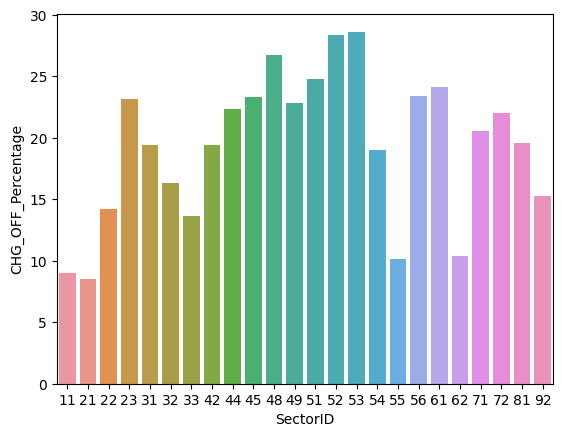

In [25]:
sns.barplot(x='SectorID', y='CHG_OFF_Percentage', data=df1)

Based on the graph, it is evident that sectors 52 and 53 have a higher likelihood of loan default, while sectors 11 and 21 demonstrate a higher rate of customers successfully repaying their loan amounts in full.


<Axes: xlabel='SectorID', ylabel='count'>

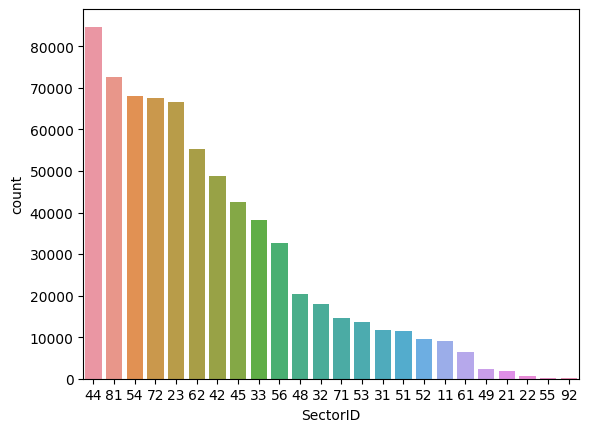

In [26]:
sql='''
SELECT
    COUNT(LOANNUMBER) AS count,
    SUBSTRING(NAICS, 1, 2) AS SectorID
FROM
    LOAN_DETAILS
WHERE
    naics <> '0'
GROUP BY
    SUBSTRING(NAICS, 1, 2)
ORDER BY count DESC;
'''
# Use pandas to execute the SQL query and load the result into a DataFrame
df1 = pd.read_sql_query(sql, conn)
# Display the first few rows of the DataFrame
sns.barplot(x='SectorID', y='count', data=df1)

The graph provides an overview of the number of loan applications within each specific sector.


In [27]:
# Commit changes to the database to persist the modifications
conn.commit()
# Close the database connection to release resources
conn.close()

In [28]:
# Drop rows with missing values in any column from the DataFrame
df=df.dropna()

# Convert the 'SBA_APPV' column to numeric, removing commas and stripping extra characters
df['SBA_APPV'] = pd.to_numeric(df['SBA_APPV'].str.replace(',', '').str.strip(' "'), errors='coerce')

# Convert the 'GRAPPV' column to numeric, removing commas and handling errors by coercing to NaN
df['GRAPPV'] = pd.to_numeric(df['GRAPPV'].str.replace(',', ''), errors='coerce')

# Convert the 'DISBURSEMENTGROSS' column to numeric, removing commas and handling errors by coercing to NaN
df['DISBURSEMENTGROSS'] = pd.to_numeric(df['DISBURSEMENTGROSS'].str.replace(',', ''), errors='coerce')

# Convert the 'NEWEXIST' column to numeric
df['NEWEXIST']=pd.to_numeric(df['NEWEXIST'])

# Calculate the 'PORTION' column as the ratio of 'SBA_APPV' to 'GRAPPV'
df['PORTION'] = df['SBA_APPV'] / df['GRAPPV']

# Convert 'DISBURSEMENTDATE' and 'APPROVALDATE' columns to datetime format, handling errors by coercing to NaT
df['DISBURSEMENTDATE'] = pd.to_datetime(df['DISBURSEMENTDATE'], errors='coerce')
df['APPROVALDATE'] = pd.to_datetime(df['APPROVALDATE'], errors='coerce')

# Display the data types of each column in the DataFrame
df.dtypes

/tmp/ipykernel_19/728447818.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['DISBURSEMENTDATE'] = pd.to_datetime(df['DISBURSEMENTDATE'], errors='coerce')
/tmp/ipykernel_19/728447818.py:21: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['APPROVALDATE'] = pd.to_datetime(df['APPROVALDATE'], errors='coerce')


LOANNUMBER                  float64
CUSTOMER_NAME                object
CITYID                        int64
BANKID                        int64
NAICS                        object
APPROVALDATE         datetime64[ns]
TERM                          int64
NOEMP                         int64
NEWEXIST                    float64
CREATEJOB                     int64
RETAINEDJOB                   int64
FRANCHISECODE                 int64
URBANRURAL                    int64
REVLINECR                    object
LOWDOC                       object
DISBURSEMENTDATE     datetime64[ns]
DISBURSEMENTGROSS           float64
MIS_STATUS                   object
GRAPPV                      float64
SBA_APPV                    float64
CITYID                        int64
BANKID                        int64
BANKSTATE                    object
PORTION                     float64
dtype: object

In [29]:
# Define the start and end dates of the recession period
recession_start = pd.to_datetime('2007-12-01')
recession_end = pd.to_datetime('2009-06-30')

# Create the 'RECESSION' column based on whether the disbursement date falls within the recession period
df['RECESSION'] = ((df['DISBURSEMENTDATE'] >= recession_start) & (df['DISBURSEMENTDATE'] <= recession_end)).astype(int)

# Create the 'REALESTATE' column based on the term of the loan (240 months or more)
df['REALESTATE'] = np.where(df['TERM'] >= 240, 1, 0)

# Create the 'DEFAULT' column based on whether the MIS status is not 'P I F' (Paid In Full)
df['DEFAULT'] = (df['MIS_STATUS'] != 'P I F').astype(int)

In [30]:
# Create a subset DataFrame ('subset_df') containing selected columns from the original DataFrame ('df')
subset_df=df[['RECESSION','REALESTATE','PORTION','DISBURSEMENTGROSS','URBANRURAL',
              'RETAINEDJOB','CREATEJOB','NEWEXIST','NOEMP','TERM','DEFAULT']]
# Display the first few rows of the subset DataFrame
subset_df.head()

,RECESSION,REALESTATE,PORTION,DISBURSEMENTGROSS,URBANRURAL,RETAINEDJOB,CREATEJOB,NEWEXIST,NOEMP,TERM,DEFAULT
0,0,0,0.50,50000.0,1,5,2,2.0,5,66,1
1,0,0,0.50,150327.0,1,1,0,1.0,1,48,0
2,0,0,0.50,25000.0,1,1,0,1.0,1,84,0
3,1,0,1.00,1170000.0,1,0,65,1.0,10,120,0
4,0,0,0.75,127000.0,1,0,0,1.0,8,120,0


# Data Standardization


In [31]:
# Assuming subset_df is your DataFrame
# Select the columns you want to scale (numeric columns)
numeric_columns = subset_df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler object
scaler = StandardScaler()

# Scale the selected columns
subset_df[numeric_columns] = scaler.fit_transform(subset_df[numeric_columns])

subset_df.head()

/tmp/ipykernel_19/3635741429.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_df[numeric_columns] = scaler.fit_transform(subset_df[numeric_columns])


,RECESSION,REALESTATE,PORTION,DISBURSEMENTGROSS,URBANRURAL,RETAINEDJOB,CREATEJOB,NEWEXIST,NOEMP,TERM,DEFAULT
0,-0.249236,-0.451319,-1.205814,-0.525851,0.37475,-0.024449,-0.027168,1.592909,-0.086513,-0.567774,2.153009
1,-0.249236,-0.451319,-1.205814,-0.177115,0.37475,-0.041318,-0.035618,-0.620706,-0.140489,-0.796034,-0.464466
2,-0.249236,-0.451319,-1.205814,-0.612751,0.37475,-0.041318,-0.035618,-0.620706,-0.140489,-0.339513,-0.464466
3,4.012265,-0.451319,1.671782,3.367268,0.37475,-0.045535,0.239005,-0.620706,-0.019045,0.117008,-0.464466
4,-0.249236,-0.451319,0.232984,-0.258199,0.37475,-0.045535,-0.035618,-0.620706,-0.046032,0.117008,-0.464466


# Correlation Matrix


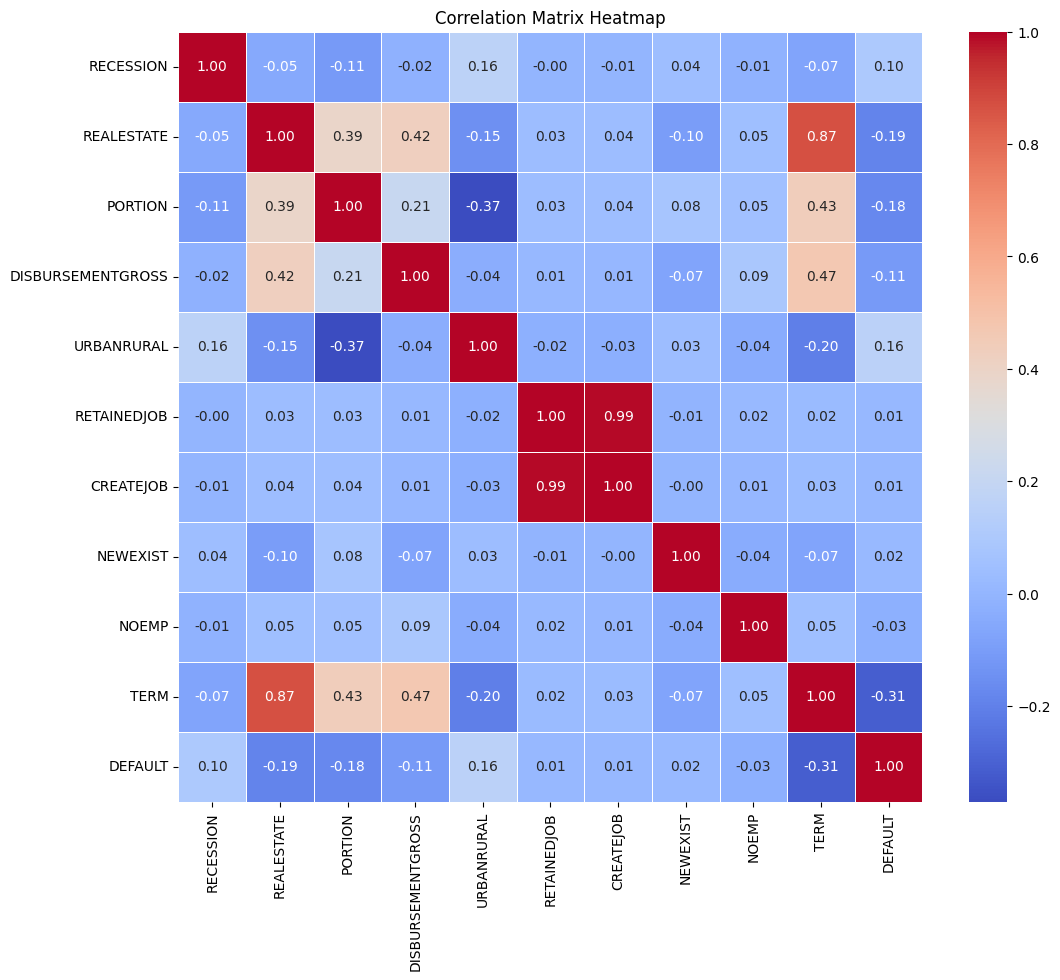

In [32]:
# Compute the correlation matrix for the selected columns in the subset DataFrame ('subset_df')
correlation_matrix = subset_df.corr()
# Display the correlation matrix
correlation_matrix
# Set up the visualization: create a heatmap of the correlation matrix using Seaborn and Matplotlib
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# Add title and display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

# Logistic Regression


In [33]:
# Assuming subset_df is your DataFrame
# Drop any rows with missing values
subset_df = subset_df.dropna()

# Select features (independent variables) by excluding 'DEFAULT'
X = subset_df.drop(columns=['DEFAULT'])

# Select the target variable
y = subset_df['DEFAULT']

#Convert target variable to label to run classification models
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)



# Create a logistic regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.8341379214343384

Confusion Matrix:
[[143677   4259]
 [ 25529   6130]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.97      0.91    147936
           1       0.59      0.19      0.29     31659

    accuracy                           0.83    179595
   macro avg       0.72      0.58      0.60    179595
weighted avg       0.80      0.83      0.80    179595



# Random Forest Classifier


In [34]:
# Assuming subset_df is your DataFrame
# Drop any rows with missing values
subset_df = subset_df.dropna()

# Select features (independent variables) by excluding 'DEFAULT'
X = subset_df.drop(columns=['DEFAULT'])

# Select the target variable
y = subset_df['DEFAULT']

#Convert target variable to label to run classification models
lab = preprocessing.LabelEncoder()
y_transformed = lab.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Create a Random Forest model
model = RandomForestClassifier()

# Train the model on the training set
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Display evaluation metrics
print(f'Accuracy: {accuracy}')
print('\nConfusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(classification_rep)


Accuracy: 0.9283053537125199

Confusion Matrix:
[[142558   5378]
 [  7498  24161]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96    147936
           1       0.82      0.76      0.79     31659

    accuracy                           0.93    179595
   macro avg       0.88      0.86      0.87    179595
weighted avg       0.93      0.93      0.93    179595



# CONCLUSION


Exploratory Data Analysis revealed key insights into the behavior of loan customers, shedding light on patterns of loan repayment and charge-offs.

The distribution of loan applications across various sectors provides insights into the demand and popularity of loans within each sector. This information can be valuable for strategic decision-making.

Through thorough analysis, certain variables were identified as strong predictors of loan default.

The random forest model outperforms logistic regression in terms of precision, recall, and F1-score. Random forest achieves higher precision, recall, and F1-score for identifying risky instances.

The Random Forest model emerged as the most effective predictive tool, showcasing its ability to discern whether a customer is likely to repay or face charge-offs.

Leveraging the RF model in lending decisions empowers financial institutions to make more informed choices, assessing the creditworthiness of applicants based on historical repayment data and contributing to prudent and data-driven lending practices.

The application of data-driven models supports the overall financial stability of the institution. Informed lending decisions based on predictive analytics enhance risk management, safeguarding the institution against potential defaults.
